# Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import faiss

# Lendo o conjunto de dados

O conjunto de dados é relacionado a presença ou não do câncer de mama em diversos pacientes, e contém diversos atributos, na maioria numméricos. O conjunto de dados foi retirado do Kaggle e pode ser obtido no seguinte link

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [147]:
df = pd.read_csv("breast-cancer.csv")

In [148]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Características do conjunto
df.shape

(569, 32)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Verificando a classe alvo
pd.unique(df['diagnosis']) # M: Maligno B: Benigno.

array(['M', 'B'], dtype=object)

In [146]:
df.isna().sum()

diagnosis                  0
texture_mean               0
smoothness_mean            0
compactness_mean           0
symmetry_mean              0
fractal_dimension_mean     0
texture_se                 0
perimeter_se               0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Analisando os atributos

In [8]:
df['diagnosis'].value_counts().keys()

Index(['B', 'M'], dtype='object')

## Classe alvo

In [9]:
sns.set_theme()
sns.set(rc={'figure.figsize':(10,5)})


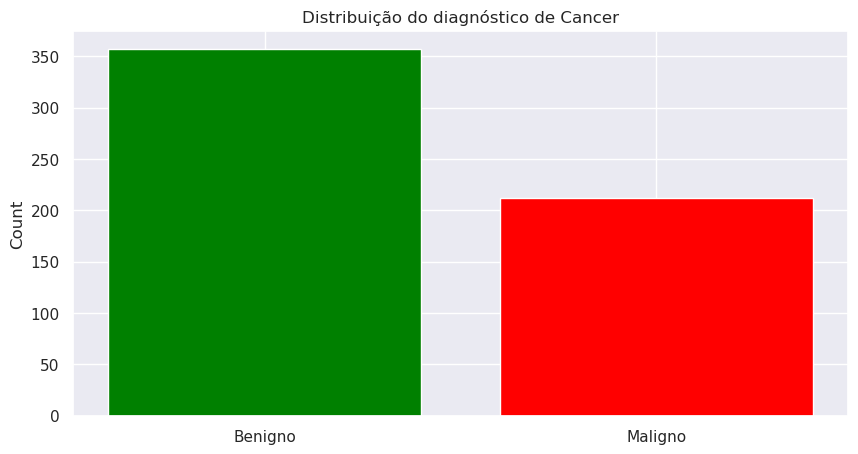

In [10]:
plt.bar(df['diagnosis'].value_counts().keys(),df['diagnosis'].value_counts().values,color=('green','red'))
plt.xticks(df['diagnosis'].value_counts().keys(),['Benigno','Maligno'])

plt.ylabel("Count")
plt.title("Distribuição do diagnóstico de Cancer")

plt.show()

Podemos perceber que este conjunto de dados parece bastante equilibrado não contendo um desbalanceamento tão evidente, desta maneira, não será preciso realizar o rebalanceamento do conjunto de dados

## Calculando a correlação e removendo atributos redundantes

In [11]:
#Retriada/Identificação de atributos numéricos
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numericas = df.select_dtypes(include=numerics)

In [12]:
#Função que determina a correlação para cada par de atributos em todo o conjunto de dados e armazena em um novo dataframe
def correlacao(df):

    df_corr = pd.DataFrame(columns=['Nome Col 1', 'Nome Col 2', 'Correlação'])
    index = 0
    for coluna_x in df.columns:
        for coluna_y in df.columns:
            if coluna_x == coluna_y:
                continue
            cor = df[coluna_x].corr(df[coluna_y])
            df_corr.loc[index] = [coluna_x,coluna_y,cor]
            index += 1
    return df_corr

df_corr = correlacao(df_numericas)

In [13]:
df_corr.shape

(930, 3)

In [14]:
#Verificar quais correlações são NULAS
df_corr[df_corr['Correlação'].isna()]

,Nome Col 1,Nome Col 2,Correlação


In [15]:
df_corr.sort_values(['Correlação'], ascending=False)[df_corr['Correlação'] > 0.9]


/tmp/ipykernel_21506/2697394845.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_corr.sort_values(['Correlação'], ascending=False)[df_corr['Correlação'] > 0.9]


,Nome Col 1,Nome Col 2,Correlação
91,perimeter_mean,radius_mean,0.997855
32,radius_mean,perimeter_mean,0.997855
711,perimeter_worst,radius_worst,0.993708
652,radius_worst,perimeter_worst,0.993708
33,radius_mean,area_mean,0.987357
121,area_mean,radius_mean,0.987357
123,area_mean,perimeter_mean,0.986507
93,perimeter_mean,area_mean,0.986507
653,radius_worst,area_worst,0.984015
741,area_worst,radius_worst,0.984015


É possível compreender que temos muitos atributos repetivios, com valores altos de correlação entre eles, desta maneira é interessante remover alguns destes atributos, o que irá ajudar, visto que o algoritmo de kNN é muito susceptível a alta dimensionalidade, então é interessantes remover alguns destre atributos

In [16]:
df_remo = df_corr.sort_values(['Correlação'], ascending=False)[df_corr['Correlação'] > 0.9]

/tmp/ipykernel_21506/3978527491.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_remo = df_corr.sort_values(['Correlação'], ascending=False)[df_corr['Correlação'] > 0.9]


É interessante remover alguns destes atributos, mas não ambos, apenas um dos dois deve ser removido, visto que o outro atributo ainda terá as informações do atributo antes de ser removido.

In [17]:
aux = df_remo.copy()

feats = []
while aux.shape[0] != 0:
    
    r = aux.iloc[0,0]
    
    aux = aux[ (aux['Nome Col 1'] != r) & (aux['Nome Col 2'] != r)]
    
    feats.append(r)

In [18]:
feats

['perimeter_mean',
 'perimeter_worst',
 'radius_mean',
 'radius_worst',
 'radius_se',
 'area_mean',
 'area_se',
 'concavity_mean',
 'texture_worst',
 'concave points_mean']

In [19]:
df.drop(feats,axis=1,inplace=True)

## Verificando outliers

COmo se trata de um algoritmo baseado em distância é necessário tratar os outliers para evitar problemas na hora da classificação

In [20]:
df.describe()

,id,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,compactness_se,...,concave points_se,symmetry_se,fractal_dimension_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,19.289649,0.096360,0.104341,0.181162,0.062798,1.216853,2.866059,0.007041,0.025478,...,0.011796,0.020542,0.003795,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,4.301036,0.014064,0.052813,0.027414,0.007060,0.551648,2.021855,0.003003,0.017908,...,0.006170,0.008266,0.002646,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,9.710000,0.052630,0.019380,0.106000,0.049960,0.360200,0.757000,0.001713,0.002252,...,0.000000,0.007882,0.000895,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,16.170000,0.086370,0.064920,0.161900,0.057700,0.833900,1.606000,0.005169,0.013080,...,0.007638,0.015160,0.002248,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,18.840000,0.095870,0.092630,0.179200,0.061540,1.108000,2.287000,0.006380,0.020450,...,0.010930,0.018730,0.003187,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,21.800000,0.105300,0.130400,0.195700,0.066120,1.474000,3.357000,0.008146,0.032450,...,0.014710,0.023480,0.004558,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,39.280000,0.163400,0.345400,0.304000,0.097440,4.885000,21.980000,0.031130,0.135400,...,0.052790,0.078950,0.029840,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Pode-se perceber que para o atributo area_wrost temos um grande desvio padrão, o que pode indicar a presença de outliers. Assim, vamos verificar este atributo

In [21]:
area = df['area_worst']

In [22]:
area.max()

4254.0

In [23]:
area.min()

185.2

In [24]:
area.mean()

880.5831282952548

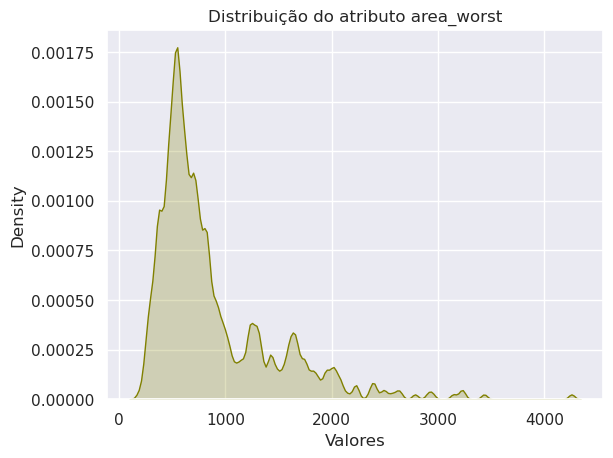

In [151]:
sns.set(style="darkgrid")

sns.kdeplot(x=area.values,fill=True, bw_method=0.05, color='olive')

plt.xlabel("Valores")

plt.title("Distribuição do atributo area_worst")
plt.show()

Podemos perceber que existe uma grande concentração de valores entre 0 e 1000, e poucos valores após isos, principlamente após 4000. É interessante verificar se isto está relacionado a algum tipo de classe

In [26]:
df[df['area_worst'] > 1000]['diagnosis'].value_counts()

M    150
B      3
Name: diagnosis, dtype: int64

Podemos compreender que esta característica está diretamente relacionada com a classe principla, tendo em vista que a partir de 1000 de área, a tendência é que o cancer seja maligno, desta maneira podemos manter este atributo nesta distribuição visto que este valor irá ajudar na classificação

## Remoção de alguns atributos irrelevantes

In [27]:
df.columns

Index(['id', 'diagnosis', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

O unico atributo que é irrelevante e pode ser retirado é o id que é apenas a identifcação do paciente

In [28]:
df.drop('id',axis=1,inplace=True)

In [29]:
# Separando a classe alvo do resto do conjunto de dados

y = df['diagnosis']

In [30]:
X = df.drop('diagnosis',axis=1)

In [31]:
assert y.shape[0] == X.shape[0]

## Separando dados em treino e teste

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

Após isto, precisamos normalizar os conjunto de treino e teste visto que estamos trabalhando com um algoritmo que calcula a distância entre os objetos, e desta maneira uma grande variação entre os valores dos atributos pode resultar em predominância de um único atributo

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
X_train.shape

(398, 20)

In [38]:
def transform(x):
    if x == 'M':
        return 1
    return 0

In [39]:
vfunc = np.vectorize(transform)

In [40]:
y_train = vfunc(y_train)
y_test = vfunc(y_test)

# Classificação

Para realizar a classificação utilizaremos uma bibilioteca que contém a busca pelos vizinhos mais próximos aproximados, o que faz com que o problema possar ser escalável, o que é muito interessante para grandes conjuntos de dados.

Além disso, utilizaremos GPU para acelerar mais ainda o processo. Entretanto como este conjunto de dados é pequeno a diferença não seja notável, mas com este algoritmo e implementação, seriámos capazes de lidar com grandes conjuntos de dados sem ter problema com o alto número de amostras.

Neste caso iremos avaliar 3 algoritmos de kNN: Força Bruta, IVFFLat e IVFPQ, e verificar como eles se comportam. É claro que o algoritmo de força bruta irá conseguir os melhores resultados, visto que da os vizinhos exatos, mas ao utilizar métodos aproximados temos a chance de lidar com maiores conjuntos de dados, visto que a complexidade do problema é reduzida. Além disso, estes algoritmos contém suporte para multi-GPU oque iria acelerar mais ainda os processos.

In [41]:

class MultiGPUIndex:

    #Construtor da classe
    def __init__(self, k):
        
        self.k = k

    
    def fit(self,X,y):
        self.index.add(X)
        self.labels = y
        
        
    def predict(self,X):

        """
        This functions performs the search of the kNN and them return the indices of them
        """

        _, I = self.index.search(X,self.k)

        I = I[:,1:]
        
        vals = pd.unique(self.labels)
    
        dic = {}
    
        n,_ = I.shape
        
        predicted_data = np.zeros((n,1))
        
        for index,vetor in enumerate(I):
    
            #Inicializa a enqute
            for name in vals:
                dic[name] = 0
    
            for i in vetor:
                label = self.labels[i]
                dic[label] += 1
            predicted_data[index] = max(dic, key = lambda x: dic[x])  

            
        return predicted_data



## Algoritmo Força Bruta

In [42]:
class MultiBrute(MultiGPUIndex):

    def __init__(self,k,dimensions):
        super().__init__(k)

        ## Multi-GPU config
        self.res = faiss.StandardGpuResources()
        self.co = faiss.GpuIndexFlatConfig()

        ## Make the index on CPU
        self.index = faiss.GpuIndexFlatL2(self.res, dimensions, self.co)
        





In [43]:
a = MultiBrute(k=13,dimensions=20)

In [44]:
a.fit(X_train,y_train)

In [45]:
y_pred = a.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_pred)

0.9532163742690059

In [47]:
del a,y_pred

## Algoritmo IVFFlat

In [48]:
class MultiIVFFlat(MultiGPUIndex):

    def __init__(self,k,dimensions,nprobe,nlist):
        super().__init__(k)

        ## Approximate method settings
        self.nprobe = nprobe
        self.nlist = nlist

        self.res = faiss.StandardGpuResources()
        self.config = faiss.GpuIndexIVFFlatConfig()

        self.index = faiss.GpuIndexIVFFlat(self.res, dimensions, nlist, faiss.METRIC_L2,self.config)
        self.index.setNumProbes(nprobe)


    def fit(self,X,y):
        print("Oi")
        self.index.train(X[:int(1e6)])
        super().fit(X,y)



In [49]:
obj = MultiIVFFlat(k=13,dimensions=20,nprobe=2,nlist=10)

In [50]:
obj.fit(X_train,y_train)

Oi


In [51]:
y_pred = obj.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_pred)

0.9415204678362573

In [53]:
del obj,y_pred

## Algoritmo IVFPQ

In [54]:
class MultiIVFPQ(MultiGPUIndex):

    def __init__(self,k,dimensions,nprobe,nlist):
        super().__init__(k)

        ## Approximate method settings
        self.nprobe = nprobe
        self.nlist = nlist

        # we need only a StandardGpuResources per GPU
        res = faiss.StandardGpuResources()
        flat_config = faiss.GpuIndexFlatConfig()
    
        index = faiss.GpuIndexFlatL2(res, dimensions, flat_config)    
    
        M_list = [1, 2, 3, 4, 8, 12, 16, 20, 24, 28, 32, 48, 56, 64, 96] 
        M = dimensions
        count = len(M_list)-1
        while M % M_list[count] != 0:
            count -= 1
            if count == 0:
                break
        M = M_list[count]

        
        index = faiss.index_factory(dimensions, f"IVF{nlist},PQ{M}")
        co = faiss.GpuClonerOptions()
        
        if M >= 56:
            co.useFloat16 = True
    
        self.index = faiss.index_cpu_to_gpu(res, 0, index, co)

        self.index.setNumProbes(nprobe)


    def fit(self,X,y):
        print("Oi")
        self.index.train(X[:int(1e6)])
        super().fit(X,y)

In [69]:
obj = MultiIVFPQ(k=13,dimensions=20,nprobe=10,nlist=2)

In [70]:
obj.fit(X_train,y_train)

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

In [71]:
y_pred = obj.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_pred)

0.9532163742690059

In [73]:
del obj

In [74]:
del y_pred

# Primeira análise

Todos os algoritmos obtiveram resultados muito bons, atingindo na maioria dos casos, mais de 95% de acertos. Entretanto, após em rápido estudo no conceito destes algoritmos foi possível identificar que:

- O algoritmo por força bruta, embora seja muito bom em pequenos conjuntos de dados, por ter uma complexidade assintótica de O(n²), não é um algoritmo interessante para ser estudado quando se pensa em escalabilidade.

- O algoritmo IVFFLat tem um grand problema em relação a memória, tendo em vista que utiliza bastante memória durante sua execução

- O algoritmo IVFPQ Parece perfeito para quando se deseja trabalhar com grandes conjuntos de dados, visto que realiza uma compressão dos vetores, limitando a memória utilizada pelo método e mesmo assim, atingindo bons resultados.

Dessa maneira, um estudo mais profundo será feito utilizando o IVFPQ, modificando seus parâmetros e entendendo sua ideia

Os dois principais parâmetros do algoritmo IVFPQ é nprobe e nlist. Esse parametros se referem ao seguinte:

- NList: Como o algoritmo utiliza a ideia de que é possível evitar a busca exata por meio de mapeamentos de vetores para certas regiões de um novo espaço de dados, que são as partições, essa partições agrupam vetor de treino similares.
- Nprobe: Com as partições é possível procurar apenas nas partições mais próximos, evitando a comparação com todos os vetores do conjunto de dados, e desta maneira, este valor controla quantas partições serão procuradas, nota-se que caso o número de nlist e nprobe sejam iguais, estaríamos realizand a busca exata

Desta maneira, precisámos entender como funciona cada parâmetro (o número de vizinhos também é um importante parâmetro)

Como a quantidade de dados não é tão grande, os valores de nlist poderão será 10, já que não temos uma grande quantidade de dados.

Já os valores de nprobe serão 1,2,3,4,5

Os valores de k poderão varias de 3 à 21.


Desta maneira, podemos verificar os resultados no benchmarking abaixo, visando encontrar os melhores parâmetros para o modelo

In [82]:
# Nlist
nlist = 10
nprobes = [1,2,3,4,5]
k = range(3,22,2)

In [83]:
def benchmarking(k,nlist,nprobe):
    obj = MultiIVFPQ(k=k,dimensions=20,nprobe=nprobe,nlist=nlist)

    obj.fit(X_train,y_train)

    y_pred = obj.predict(X_test)


    return accuracy_score(y_test, y_pred)

In [91]:
d = {}
for i in k:
    d[i] = {}

In [92]:
for k_val in k:
    for n in nprobes:

        val = benchmarking(k_val,n,nlist)
        d[k_val][n] = val
        

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

In [93]:
d

{3: {1: 0.9122807017543859,
  2: 0.9122807017543859,
  3: 0.9122807017543859,
  4: 0.9122807017543859,
  5: 0.9122807017543859},
 5: {1: 0.9239766081871345,
  2: 0.9239766081871345,
  3: 0.9239766081871345,
  4: 0.9239766081871345,
  5: 0.9239766081871345},
 7: {1: 0.9415204678362573,
  2: 0.935672514619883,
  3: 0.9415204678362573,
  4: 0.9415204678362573,
  5: 0.9415204678362573},
 9: {1: 0.9415204678362573,
  2: 0.9415204678362573,
  3: 0.9415204678362573,
  4: 0.9415204678362573,
  5: 0.9415204678362573},
 11: {1: 0.9473684210526315,
  2: 0.9473684210526315,
  3: 0.9473684210526315,
  4: 0.9473684210526315,
  5: 0.9473684210526315},
 13: {1: 0.9532163742690059,
  2: 0.9532163742690059,
  3: 0.9532163742690059,
  4: 0.9532163742690059,
  5: 0.9532163742690059},
 15: {1: 0.9473684210526315,
  2: 0.9532163742690059,
  3: 0.9532163742690059,
  4: 0.9532163742690059,
  5: 0.9473684210526315},
 17: {1: 0.9473684210526315,
  2: 0.9532163742690059,
  3: 0.9473684210526315,
  4: 0.947368421

Podemos perceber que em alguns casos o valor de nprobe não é tão efetivo, e isto acontece pelo fato de termos poucos valores no conjunto de dados, tendo em vista que caso houvessem mais valores este parâmetro iria interferir mais nos resultados

Com isto, podemos compreender que o parâmetro bem importante neste caso é o número de k, e desta maneira podemos verificar como o modelo se comporta com diferentes valores de k

In [100]:
acc_vals = []

for i in d:
    index = max(d[i], key = lambda x:d[i][x])

    acc_vals.append(d[i][index])

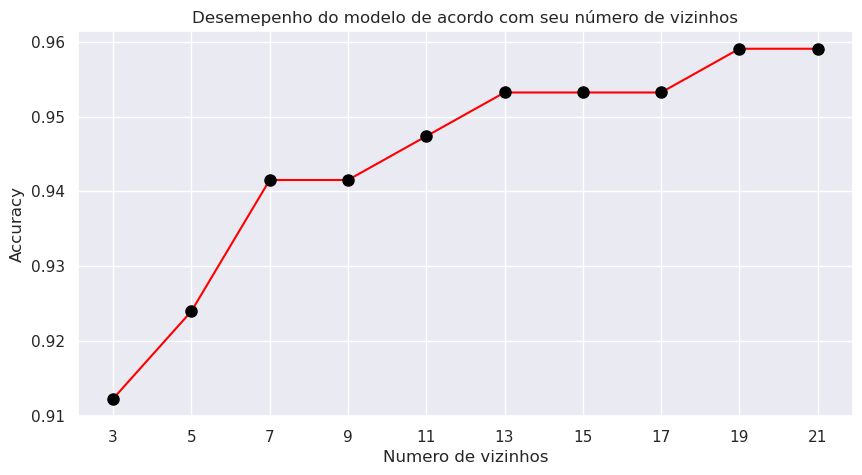

In [113]:
plt.plot(k,acc_vals,marker='o',markersize=8,color='red',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
)

plt.xticks(k,k)


plt.ylabel('Accuracy')
plt.xlabel('Numero de vizinhos')
plt.title("Desemepenho do modelo de acordo com seu número de vizinhos")

plt.show()

Podemos verificar que com a variaçãp do número de vizinhos existe uma variação na acurácia do modelo, embora pouca, na casa de 0.05, caso o número de dados seja maior essa diferença pode ser importante. Desta maneira é interessante encontrar um equilíbrio entre a acurácia e o valor de k, visto que caso o valor seja muito grande, além do fato de que o modelo pode perder a capacidade de generalização resultando em overfiting, a utilização de memória e complexidade do algoritmo irá aumentar bastante.

# Classificação Final

Após isto podemos realizar uma classificação final utilizando os hiperparâmetros buscados e tentar verificar mais informações sobre esta classificação

Para isto, utilizaremos k = 13, pois após este valor a subida começa a ser muito pouca

In [122]:
del obj

In [123]:
obj = MultiIVFPQ(k=13,dimensions=20,nprobe=3,nlist=10)

obj.fit(X_train,y_train)

y_pred = obj.predict(X_test)


accuracy_score(y_test, y_pred)

Oi


WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 398 points to 256 centroids: please provide at leas

0.9473684210526315

Um jeito interessante para verificar os resultados é verificar a matrix de confusão e o classification report, para podermmos entender os resultados

## Matriz de confusão

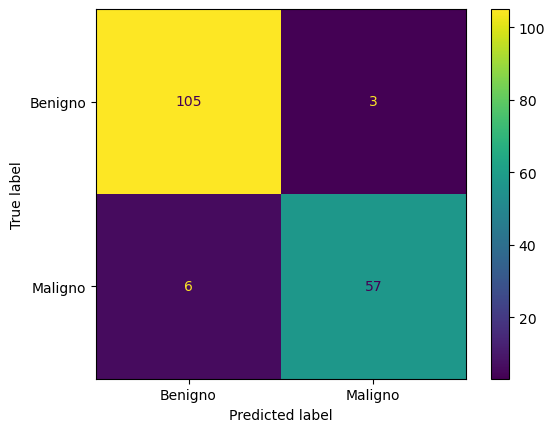

In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

sns.reset_orig() 

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,display_labels=['Benigno','Maligno'])

plt.show()

In [144]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Benigno','Maligno']))

              precision    recall  f1-score   support

     Benigno       0.95      0.97      0.96       108
     Maligno       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



Podemos compreender que os resultados foram satisfatórios, com o modelo sendo capaz de prever bem as classes tanto positivas quanto negativas, oque pode ser um problema, mas nesse caso o modelo conseguiu lidar bem com os dados.

# Conclusão

Após a realização deste projeto foi possível compreender o funcionamento do algoritmo de kNN para a classificação binária de dados. Além disso, foi possível entender a capacidade que métodos aproximados tem de conseguir substituir a altura métodos exatos, utilizando muito menos tempo e memória. Também, pode-se verificar que GPUs são extremamante benéficas para tarefas de aprendizado de máquina já que permitem uma aceleração do modelo. Finalmente, pode-se realizar uma pequena busca de hiperparâmetros para verificar qual era o mais adequado neste caso.

É importante ressaltar que a estrutura utilizada pode ser adequada para um sistema multi-GPU Que iria mostrar uma capacidade de processar rapidamente um conjunto de dados e conjuntos de dados extensos, em torno de mais de 100 milhões de amostras poderiam ser processados.